# Generalisation experiment

In [27]:
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [40]:
# Generate data.
x = np.concatenate((np.linspace(-2*np.pi, 0, 10000), np.linspace(np.pi, 3*np.pi, 10000)))
x_test = np.linspace(-2*np.pi, 3*np.pi, 25_000)
y = np.sin(x)
y_test = np.sin(x_test)

training_data = np.array(list(zip(x, y)))
test_data = np.array(list(zip(x_test, y_test)))

# Split data into batches for training.
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

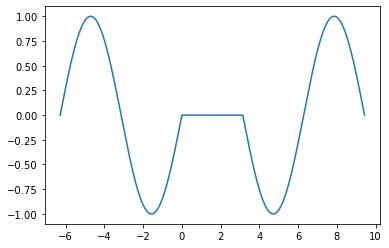

In [29]:
# Plot data points.
fig, ax = plt.subplots()
ax.plot(x, y)

In [103]:
# Training on CPU.
device = "cpu"
n = 512

# Specify a model.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.shallow_relu = nn.Sequential(
            nn.Linear(1, n),
            nn.ReLU(),
            nn.Linear(n, 1)
        )
        
    def forward(self, x):
        return self.shallow_relu(x)

In [104]:
def train(dataloader, model, loss_fn, optimiser):
    """Train model for one epoch."""
    size = len(dataloader.dataset)
    model.train()
    for i, batch in enumerate(dataloader):
        X, y = batch[:, 0].float().unsqueeze(1), batch[:, 1].float().unsqueeze(1)

        # Compute prediction error.
        pred = model(X)

        # print(f"pred: {pred}")
        loss = loss_fn(pred, y)
        
        # Backpropagate error.
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        if i % 100 == 0:
            loss, current = loss.item(), i * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [105]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # Sets the model in evaluation mode, no gradients computed.
    test_loss, correct = 0, 0
    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            X, y = batch[:, 0].float().unsqueeze(1), batch[:, 1].float().unsqueeze(1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred==y).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, avg. loss: {test_loss:>8f}\n")

In [106]:
model = NeuralNetwork().to(device).float()
loss_fn = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------------------")
    train(train_dataloader, model, loss_fn, optimiser)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
---------------------------------
loss: 7.043593 [    0/20000]
loss: 0.066724 [ 6400/20000]
loss: 0.009656 [12800/20000]
loss: 0.006616 [19200/20000]
Test error: 
 Accuracy: 0.0%, avg. loss: 19805113176882.832031

Epoch 2
---------------------------------
loss: 155361583562752.000000 [    0/20000]
loss: 317100084029389403565588480.000000 [ 6400/20000]
loss:     nan [12800/20000]
loss:     nan [19200/20000]
Test error: 
 Accuracy: 0.0%, avg. loss:      nan

Epoch 3
---------------------------------
loss:     nan [    0/20000]
loss:     nan [ 6400/20000]
loss:     nan [12800/20000]
loss:     nan [19200/20000]
Test error: 
 Accuracy: 0.0%, avg. loss:      nan

Epoch 4
---------------------------------
loss:     nan [    0/20000]
loss:     nan [ 6400/20000]
loss:     nan [12800/20000]
loss:     nan [19200/20000]
Test error: 
 Accuracy: 0.0%, avg. loss:      nan

Epoch 5
---------------------------------
loss:     nan [    0/20000]
loss:     nan [ 6400/20000]
loss:     nan [12800/20

KeyboardInterrupt: 

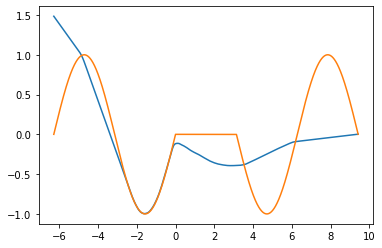

In [71]:
# Plot the fitted curve.
y_pred = model(torch.tensor(x_test).float().unsqueeze(1)).detach().numpy()

plt.plot(x_test, y_pred)
plt.plot(x, y)